## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# Importing the dataset
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df.nunique()[0:1]

user_id    290584
dtype: int64

d. The proportion of users converted.

In [5]:
df[df["converted"]==1].user_id.count()/df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
result = df.query("landing_page == 'new_page' and group != 'treatment' " ).count()+df.query("landing_page != 'new_page' and group == 'treatment' " ).count()

result[0]

3893

f. Do any of the rows have missing values?

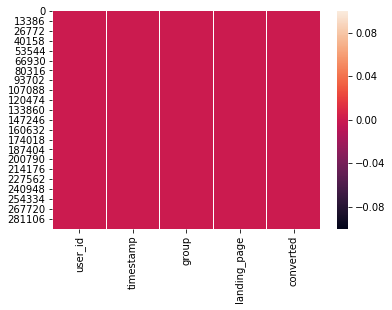

In [7]:
import seaborn as sns
sns.heatmap(df.isnull())

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Extracting the rows with treatment and control seperately from the dataframe df.
df_treat = df.query("group == 'treatment' and landing_page == 'new_page'")
df_control = df.query ("group == 'control' and landing_page == 'old_page'")

In [9]:
# appending both the groups and making it as a single dataframe name df2.
df2 = df_treat.append(df_control)

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]


0

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'control') == (df2['landing_page'] == 'old_page')) == False].shape[0]

0

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 2 to 294476
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
df2.user_id.nunique()


290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
result = df2.user_id.value_counts() >= 2
result[0:1]


773192    True
Name: user_id, dtype: bool

c. What is the row information for the repeat **user_id**? 

In [15]:
df.query("user_id == 773192 ")

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
df2.drop(2893,inplace=True)

In [17]:
df2.query("user_id == 773192 ")

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


In [18]:
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
df2[df2["converted"]==1].user_id.count()/df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
# filtering the records in control group

df_control = df2[df2["group"] == "control"]
df_control[df_control["converted"]==1].user_id.count()/df_control.shape[0]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
df_treat = df2[df2["group"] == "treatment"]
df_treat[df_treat["converted"]==1].user_id.count()/df_treat.shape[0]

0.11880806551510564

d. What is the probability that an individual received the new page?

In [22]:
df2[df2["landing_page"]=="new_page"].user_id.count()/df2.shape[0]

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

The overall conversion rate regardless of the page received is 0.119 which is around 12%. After analysing the control and treatment groups individually their conversion rate is 0.120 and 0.118 respectively. The difference between conversion rate of both the pages is very very minute and it doesn't strongs the evidence that the new treatment page leads to more conversions.So it is evident that new treatment page has equal or low conversion rate than the old control pages.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Null Hypothesis: 𝑝𝑜𝑙𝑑  >= 𝑝𝑛𝑒𝑤
Alternate Hypothesis : 𝑝𝑜𝑙𝑑  < 𝑝𝑛𝑒𝑤

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [23]:
𝑝𝑛𝑒𝑤 = df2["converted"].mean()
pnew

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [24]:
𝑝𝑜𝑙𝑑  = df2["converted"].mean()
𝑝𝑜𝑙𝑑 

0.11959708724499628

As mentioned both pnew and pold has equal conversion rate regarless of page obtained.

c. What is $n_{new}$, the number of individuals in the treatment group?

In [25]:
𝑛𝑛𝑒𝑤 = df2[df2["group"] == "treatment"].user_id.count()
𝑛𝑛𝑒𝑤

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [26]:
𝑛𝑜𝑙𝑑 = df2[df2["group"] == "control"].user_id.count()
𝑛𝑜𝑙𝑑

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [27]:
new_page_converted = np.random.choice([0,1],size = 145310,p=[pnew,1-pnew])
new_page_converted.mean()

0.88051063244098826

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [28]:
old_page_converted = np.random.choice([0,1],size = 145274,p=[pold,1-pold])
old_page_converted.mean()

0.88072882965981525

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [29]:
diff = old_page_converted.mean() - new_page_converted.mean()
diff

0.00021819721882698762

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [30]:
p_diff = []
for _ in range(10000):
    old_page_conv = np.random.choice([0,1],nold,p=(pold,1-pold))
    new_page_conv = np.random.choice([0,1],nnew,p=(pnew,1-pnew))
    p_diff.append(old_page_conv.mean() - new_page_conv.mean())

In [31]:
p_diff = np.array(p_diff)
p_diff

array([-0.00256904,  0.00078923, -0.00220456, ..., -0.0005253 ,
        0.00286098, -0.00199134])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([   13.,    90.,   577.,  1769.,  2980.,  2747.,  1355.,   409.,
           53.,     7.]),
 array([-0.00464808, -0.00369343, -0.00273879, -0.00178414, -0.00082949,
         0.00012515,  0.0010798 ,  0.00203445,  0.00298909,  0.00394374,
         0.00489839]),
 <a list of 10 Patch objects>)

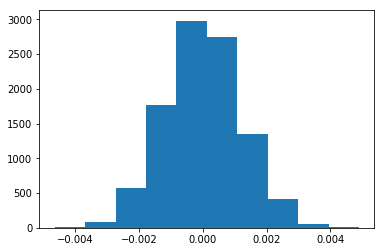

In [32]:
plt.hist(p_diff)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [33]:
old_convert = df2.query("landing_page=='old_page' and converted==1").user_id.nunique()
new_convert = df2.query("landing_page=='new_page' and converted==1").user_id.nunique()

In [34]:
old_convert

17489

In [35]:
new_convert

17264

In [36]:
diff = old_convert - new_convert
diff

225

In [37]:
# Proportion of conversion
old_prop = old_convert/nold
new_prop = new_convert/nnew
diff_prop = old_prop - new_prop
diff_prop

0.0015782389853555567

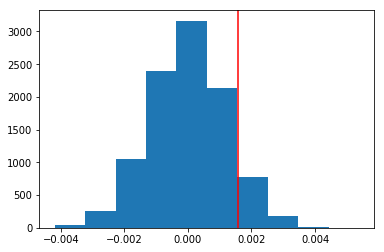

In [38]:
#calculating the estimate from the null
null_vals = np.random.normal(0,np.std(p_diff),p_diff.size)
plt.hist(null_vals)
plt.axvline(x=diff_prop,color="red")

In [39]:
(null_vals < diff_prop).mean()

0.90629999999999999

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

The value 0.9028 is nothing but a p-value.It is the probability of obtaining results as extreme as the observed results of a statistical hypothesis test assuming the null hypothesis is true.More p-value the more strong the null hypothesis is. So we are having very large p value states that we fail to reject null hypothesis. It means there is no statistical evidence that new page has more conversion rate than the old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [40]:
import statsmodels.api as sm

convert_old = 17489
convert_new = 17264
n_old = 145274
n_new = 145310 

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [42]:
z_score,p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score,p_value)

1.31092419842 0.905058312759


1.3109 is the z_score 
0.9050 is the p_value

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [44]:
from scipy.stats import norm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
norm.cdf(z_score)

0.90505831275902449

In [45]:
# critical value calculation assumed at 95% C.I.
norm.ppf(1-(0.05))


1.6448536269514722

Since our Z-score 1.3109 is small then the computed critical value 1.644. If our z score fall out of this critical value bounday we can reject the null hypothesis.But here it falls within the boundary.So we fail to reject null hypothesis.These results gets matches with the previous findings from j and k which also fails to rejects the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Since the prediction is about categorical response, it is good to use logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [47]:
df2["intercept"] = 1
df2[["ab_page1","ab_page2"]] = pd.get_dummies(df2["group"])


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [49]:
lm = sm.Logit(df2["converted"],df2[["intercept","ab_page2"]])


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [50]:
models = lm.fit()
models.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 14 Aug 2020   Pseudo R-squ.:               8.077e-06
Time:                        21:42:17   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page2      -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

The p-value associated with the ab_page is 0.190 which is lower than the p-value 0.90 which is computed earlier.This is change is because of change in hypothesis. For this regression computation we used a hypothesis like

Null Hypothesis: 𝑝𝑜𝑙𝑑 >= 𝑝𝑛𝑒𝑤 Alternate Hypothesis : 𝑝𝑜𝑙𝑑 < 𝑝𝑛𝑒𝑤

For the previous part II. we took the hypothesis like

Null Hypothesis: 𝑝𝑜𝑙𝑑 is same as 𝑝𝑛𝑒𝑤 
Alternate Hypothesis : 𝑝𝑜𝑙𝑑 is not same as 𝑝𝑛𝑒𝑤

Because in part II we used one sided hypothesis and now we are using two sided hypothesis.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Yes it is good to consider other factors like age, course name and gender of the user's and this might influence the results.While analysing all these factors individually results in some inference and if we group all together it will leads to some other inference this is what called as Simpson's paradox.

Eventhough it is good to consider the external factors it also has many drawbacks like we are adding more predictors into our model and if all our predictor variables are higly correlated then it leads to multi collinearity problem.In addition ot that it might produce inaccurate results due to correlated errors.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [65]:
countries = pd.read_csv("countries.csv")
countries = countries.set_index("user_id")
countries.head()

,country
user_id,
834778,UK
928468,US
822059,UK
711597,UK
710616,UK


In [72]:
df3 = df2.join(countries,on="user_id")


In [77]:
### Create the necessary dummy variables
df3['intercept'] = 1
df3[["US","UK","CA"]] = pd.get_dummies(df3["country"])
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page1,ab_page2,country,US,UK,CA
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US,0,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0,1,CA,1,0,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0,1,UK,0,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0,1,CA,1,0,0


In [78]:
lm = sm.Logit(df3["converted"],df3[["intercept","US","UK"]])

In [79]:
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 14 Aug 2020   Pseudo R-squ.:               1.521e-05
Time:                        22:38:26   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
US            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

Here the p value for both the country US and UK is greater than the significant value 0.05.Hence there is no statistical evidence that the predictor country has significant impact on coversion rate.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [80]:
lm = sm.Logit(df3["converted"],df3[["intercept","US","UK","ab_page2"]])

In [81]:
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 14 Aug 2020   Pseudo R-squ.:               2.323e-05
Time:                        22:41:34   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
US            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
ab_page2      -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

Even after combining both the factors together the p value exceeds the significance level 0.05. Its proves that there is no significal impact on page conversion.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [82]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0